In [29]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [30]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2020-09-09 11:25:41.431769')

In [ ]:
# import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import pandas as pd

In [31]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)


In [32]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)


In [40]:
btc.head()
# Pandas head() method is used to return top n (5 by default) rows of a data frame or series.


,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2020-09-09 12:00:00,10179.08,10286.67,10176.16,10226.95,313.245512,3.204397e+06
2020-09-09 13:00:00,10230.75,10270.80,10172.81,10190.62,453.619363,4.633602e+06
2020-09-09 14:00:00,10193.71,10270.50,10189.15,10215.27,427.652831,4.372893e+06
2020-09-09 15:00:00,10215.27,10266.69,10194.85,10240.05,432.172269,4.425122e+06
2020-09-09 16:00:00,10244.34,10290.96,10241.56,10252.21,307.055344,3.153251e+06


<AxesSubplot:xlabel='CloseTime'>

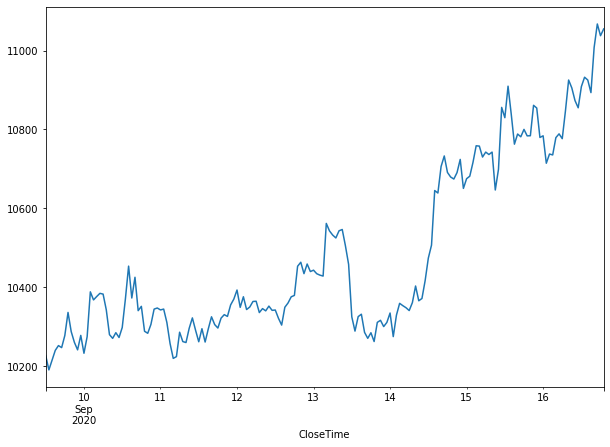

In [37]:
btc['ClosePrice'].plot(figsize=(10, 7))

In [38]:
eth.head()
# Pandas head() method is used to return top n (5 by default) rows of a data frame or series.


,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2020-09-09 12:00:00,346.49,350.35,346.35,347.54,1827.816988,6.369486e+05
2020-09-09 13:00:00,347.97,349.51,345.03,346.91,1775.303143,6.159192e+05
2020-09-09 14:00:00,346.75,352.00,346.75,347.54,3094.439775,1.082628e+06
2020-09-09 15:00:00,347.80,351.53,345.81,351.05,2339.967197,8.174279e+05
2020-09-09 16:00:00,351.48,355.04,351.48,353.25,5851.829554,2.068555e+06


<AxesSubplot:xlabel='CloseTime'>

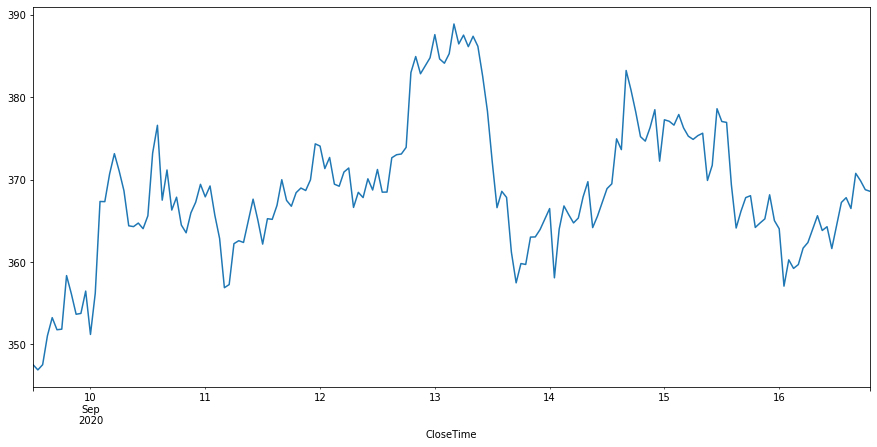

In [41]:
eth['ClosePrice'].plot(figsize=(15, 7))

In [44]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [59]:
output_notebook()


Loading BokehJS ...

In [60]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

In [61]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [62]:
btc.to_excel(writer, sheet_name='Bitcoin')

# seprating the files into 2 different sheet

In [63]:
eth.to_excel(writer, sheet_name='Ether')

In [64]:
writer.save()
